In [57]:
# Remove warnings
import warnings

warnings.filterwarnings('ignore')

# Data manipulation 
import pandas as pd
# Dates handling
from datetime import datetime, timedelta
import pytz
from dateutil.relativedelta import relativedelta
# Chart modules
import matplotlib.pyplot as plt
import seaborn as sns

# Linear algrebra
import numpy as np


# Technical indicators
from ta.momentum import stochrsi
from ta.trend import ema_indicator

from modules.Utils.utils import loadFromDB, strategyTester
from modules.Utils.indicators import computeSuperTrend

In [58]:
SYMBOL='AVAX'
df = loadFromDB(f'../backtest_tools/database/database/KuCoin/15m/{SYMBOL}-USDT.csv')
df['EMA20'] = ema_indicator(df.Close,28)
df['EMA50'] = ema_indicator(df.Close,54)
df['Stoch_RSI'] = stochrsi(df.Close, 12, smooth1=3, smooth2=3)
df.dropna(inplace=True)
df.tail()

Total records : 51591 rows


,Open,High,Low,Close,Volume,Timestamp,EMA20,EMA50,Stoch_RSI
Date,,,,,,,,,
2022-08-24 20:30:00,23.320,23.344,23.275,23.332,1793.436434,1661365800,23.260151,23.220406,0.411162
2022-08-24 20:45:00,23.332,23.338,23.249,23.277,1081.606374,1661366700,23.261313,23.222464,0.192715
2022-08-24 21:00:00,23.274,23.428,23.266,23.428,871.251553,1661367600,23.272809,23.229938,1.000000
2022-08-24 21:15:00,23.427,23.448,23.374,23.413,1509.572309,1661368500,23.282477,23.236595,0.908600
2022-08-24 21:30:00,23.425,23.547,23.425,23.547,1628.708275,1661369400,23.300720,23.247882,1.000000


In [59]:
df_day = loadFromDB(f'../backtest_tools/database/database/KuCoin/1d/{SYMBOL}-USDT.csv')
df_day = computeSuperTrend(df_day)
df_day.dropna(inplace=True)
df_day.tail()


Total records : 538 rows


,Open,High,Low,Close,Volume,Timestamp,ST_Direction
Date,,,,,,,
2022-08-20 02:00:00,22.436,23.080,21.626,22.295,600639.445648,1660953600,False
2022-08-21 02:00:00,22.294,23.551,22.144,22.979,593515.711145,1661040000,False
2022-08-22 02:00:00,22.979,23.003,21.621,22.554,488798.714395,1661126400,False
2022-08-23 02:00:00,22.562,23.734,21.831,23.524,485311.285195,1661212800,False
2022-08-24 02:00:00,23.538,23.637,22.814,23.514,247928.270558,1661299200,False


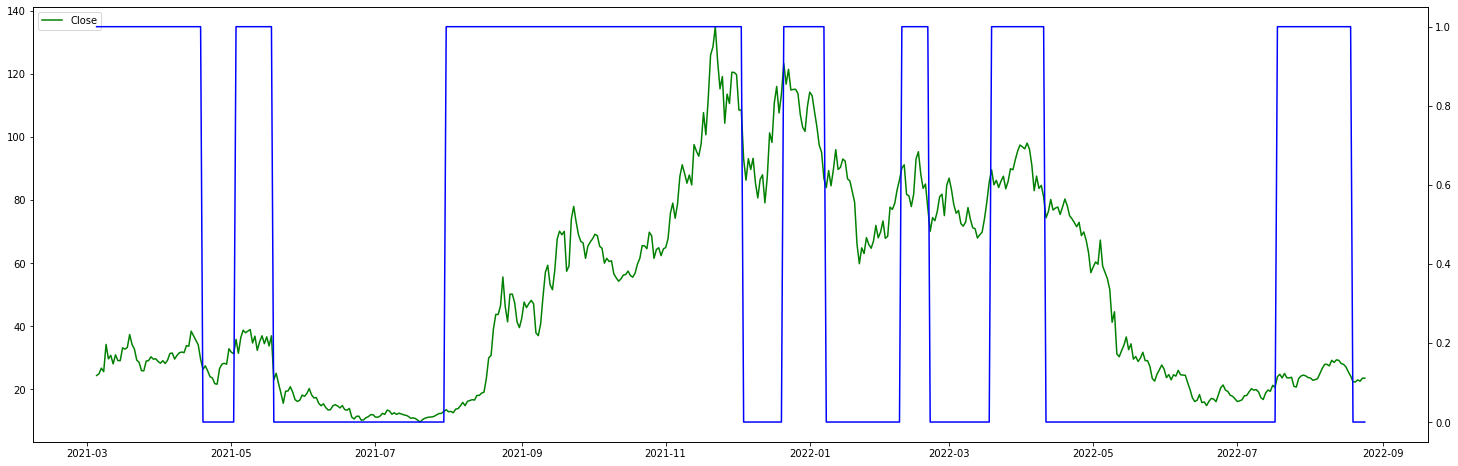

In [60]:
fig, ax = plt.subplots(1, figsize=(25,8))

ax.plot(df_day.Close, color='green',label='Close')
ax1 = ax.twinx()
ax1.plot(df_day.ST_Direction, color='blue',label='super_trend_direction')
ax.legend(loc="upper left")

In [61]:
def addST(x):
    try:
        return df_day.loc[pd.to_datetime(x.name).date().strftime("%Y-%m-%d")].ST_Direction.values[0]
    except:
        return np.nan
    
df['ST_day'] = df.apply(addST,axis=1)
df.head(30)

,Open,High,Low,Close,Volume,Timestamp,EMA20,EMA50,Stoch_RSI,ST_day
Date,,,,,,,,,,
2021-03-06 00:15:00,24.624,24.624,24.447,24.447,173.130000,1614986100,24.840253,24.813123,0.000000,True
2021-03-06 00:30:00,24.405,24.405,24.257,24.265,90.259700,1614987000,24.800581,24.793191,0.000000,True
2021-03-06 00:45:00,24.301,24.655,24.272,24.368,201.033000,1614987900,24.770748,24.777730,0.144677,True
2021-03-06 01:00:00,24.349,24.428,24.349,24.428,18.670780,1614988800,24.747110,24.765012,0.228584,True
2021-03-06 01:15:00,24.443,24.843,24.443,24.843,48.852794,1614989700,24.753723,24.767848,0.715499,True
2021-03-06 01:30:00,24.582,24.600,24.562,24.562,24.609776,1614990600,24.740501,24.760363,0.437875,True
2021-03-06 01:45:00,24.530,24.530,24.402,24.402,12.819900,1614991500,24.717156,24.747331,0.299270,True
2021-03-06 02:00:00,24.434,24.434,24.176,24.176,31.220858,1614992400,24.679835,24.726556,0.122263,True
2021-03-06 02:15:00,24.228,24.316,24.199,24.199,0.240400,1614993300,24.646674,24.707372,0.159038,True


Period : [2021-03-06 00:15:00] -> [2022-08-24 21:30:00]
Starting balance : 1000 $

----- General Informations -----
Final balance : 2988.4 $
Performance vs US Dollar : 198.84 %
Buy and Hold Performence : -3.68 %
Performance vs Buy and Hold : -5501.17 %
Best trade : +43.58 %, the 2021-08-22 01:15:00
Worst trade : -8.66 %, the 2021-08-18 13:00:00
Worst drawBack : -37.0 %
Total fees :  660.3 $

----- Trades Informations -----
Total trades on period : 206
Number of positive trades : 71
Number of negative trades :  135
Trades win rate ratio : 34.47 %
Average trades performance : 0.79 %
Average positive trades : 6.89 %
Average negative trades : -2.42 %

----- Plot -----


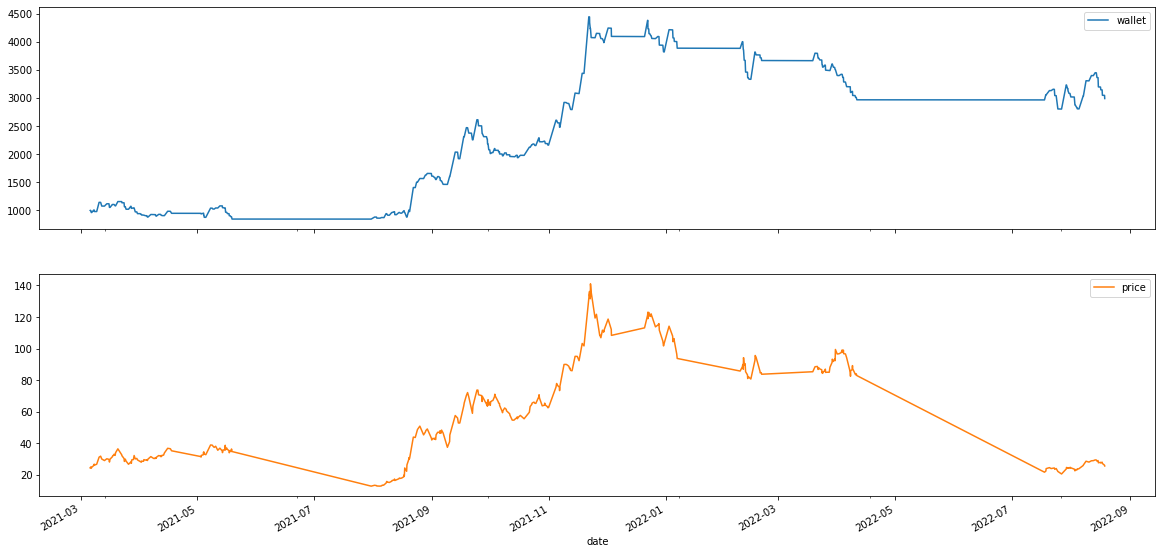

In [62]:
def buyCondition(row:pd.Series, previous_row:pd.Series=None)->bool:
    return True if row.EMA20>row.EMA50 and row.Stoch_RSI<0.82 and row.ST_day==True else False
    #return True if row.EMA20>row.EMA50 and row.Stoch_RSI<0.82 else False

def sellCondition(row:pd.Series, previous_row:pd.Series=None)->bool:
    return True if row.EMA20<row.EMA50 and row.Stoch_RSI>0.18  else False


equity = strategyTester(df,buyCondition,sellCondition)